In [1]:
# import the libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# import the data
df_path = "News_Category_Dataset.csv"
df = pd.read_csv(df_path)

df.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,NaN,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [3]:
# # remove nan value row in hastags column
# df. dropna(subset = ["hashtags"], inplace=True)
# df.head(5)

In [4]:
# # total value size
# print("Tweet Size: ", len(df))

In [5]:
# get only texts
# date_df = df[['date']]
df = df[['short_description','date']]
df.columns = ['news', 'date']

In [6]:
# # create a function to clean the tweets
# def cleanTwt(twt):
#   twt = re.sub("#bitcoin", 'bitcoin', twt) # removes the '#' from bitcoin
#   twt = re.sub("#Bitcoin", 'Bitcoin', twt) # removes the '#' from Bitcoin
#   twt = re.sub('#[A-Za-z0-9]+', '', twt) # removes any string with a '#'
#   twt = re.sub('\\n', '', twt) # removes the '\n' string
#   twt = re.sub('https:\/\/\S+', '', twt) # removes any hyperlinks
#   return twt

In [7]:
# df['cleaned_tweets'] = df['tweets'].apply(cleanTwt)
# df

In [9]:
# # create a function to get subjectivity
# def getSubjectivity(news):
#   return TextBlob(news).sentiment.subjectivity

# # create a function to get the polarity
# def getPolarity(news):
#   return TextBlob(news).sentiment.polarity

# # create two new columns called "Subjectivity" & "Polarity"
# df['subjectivity'] = df['news'].apply(getSubjectivity)
# df['polarity'] = df['news'].apply(getPolarity)

from textblob import TextBlob

# create a function to get subjectivity
def getSubjectivity(news):
    if isinstance(news, float):
        news = str(news)
    return TextBlob(news).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(news):
    if isinstance(news, float):
        news = str(news)
    return TextBlob(news).sentiment.polarity

# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['news'].apply(getSubjectivity)
df['polarity'] = df['news'].apply(getPolarity)


In [10]:
df.head(5)

,news,date,subjectivity,polarity
0,Health experts said it is too early to predict...,2022-09-23,0.377273,0.118182
1,He was subdued by passengers and crew when he ...,2022-09-23,0.000000,0.000000
2,"""Until you have a dog you don't understand wha...",2022-09-23,0.000000,0.000000
3,"""Accidentally put grown-up toothpaste on my to...",2022-09-23,0.000000,0.000000
4,Amy Cooper accused investment firm Franklin Te...,2022-09-22,0.550000,-0.233333


In [11]:
# create a function get the sentiment text
def getSentiment(score):
  if score < 0:
    return "negative"
  elif score == 0:
    return "neutral"
  else:
    return "positive"

In [12]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()

,news,date,subjectivity,polarity,sentiment
0,Health experts said it is too early to predict...,2022-09-23,0.377273,0.118182,positive
1,He was subdued by passengers and crew when he ...,2022-09-23,0.000000,0.000000,neutral
2,"""Until you have a dog you don't understand wha...",2022-09-23,0.000000,0.000000,neutral
3,"""Accidentally put grown-up toothpaste on my to...",2022-09-23,0.000000,0.000000,neutral
4,Amy Cooper accused investment firm Franklin Te...,2022-09-22,0.550000,-0.233333,negative


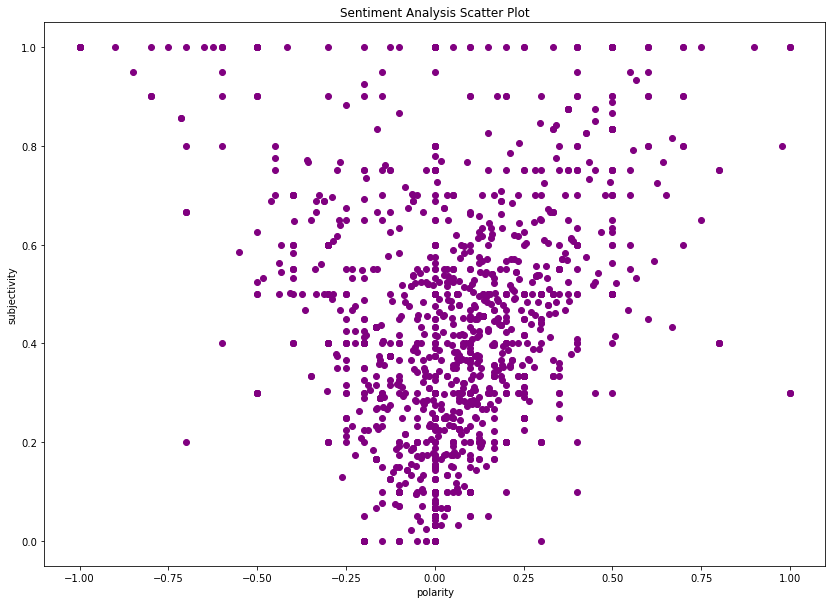

In [13]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
  plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

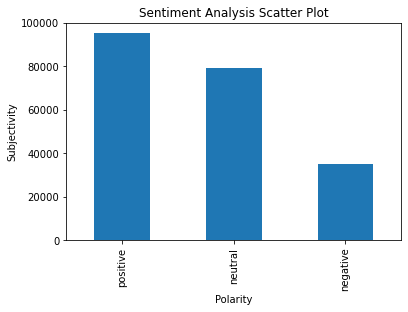

In [14]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [15]:
NewDf = df


In [16]:
NewDf['dates'] = pd.to_datetime(NewDf['date'])
NewDf.head()
NewDf.shape

(209527, 6)

In [17]:
NewDf = NewDf[['polarity', 'dates']]
NewDf.shape


(209527, 2)

In [18]:
NewDf.head()

,polarity,dates
0,0.118182,2022-09-23
1,0.000000,2022-09-23
2,0.000000,2022-09-23
3,0.000000,2022-09-23
4,-0.233333,2022-09-22


In [ ]:
# pd.set_option('display.max_rows', 500)

In [19]:
NewDf.to_csv('test.csv')

In [20]:
# Convert 'dates' column to datetime format
# NewDf['dates'] = pd.to_datetime(NewDf['dates'])

# Group the DataFrame by 'dates' and calculate the mean polarity for each date
average_df = NewDf.groupby('dates')['polarity'].mean().reset_index()

# Print the average DataFrame
average_df.shape

(3890, 2)

In [ ]:
# # Group by date and calculate the mean polarity
# average_df = NewDf.groupby('dates')['polarity'].mean().reset_index()

# # Print the new DataFrame
# average_df.shape

In [21]:
sorted_df = average_df.sort_values('dates')
sorted_df.head()

,dates,polarity
0,2012-01-28,0.124223
1,2012-01-29,0.098223
2,2012-01-30,0.094403
3,2012-01-31,0.147877
4,2012-02-01,0.168725


In [22]:
sorted_df.to_csv('sorted_polarities.csv')

In [ ]:
sorted_df

In [ ]:
sorted_df.shape